## Importing Packages for Outlier Detection Analysis and EDA 

In [34]:
import pandas as pd
import numpy as np
import sklearn
import os
import scipy
import statsmodels.api as sm
import seaborn as sns
from pyod.models.mad import MAD
from pyod.models.iforest import IForest
import matplotlib.pyplot as plt


## PyOD Package and Analysis

One of the common methods to analyze a dataset and identify outliers is to use the mean and standard deviation of the dataset. However, these two measures are prone to the outliers themselves, and if there are large magnitudes in the differences between the inliers and outliers, these metrics will be influenced significantly and hence not be representative detectors for the outliers. 

Median Absolute Difference is an alternative measure used to describe the variability or the extent to which a datapoint is an outlier. It uses the median to calculate the difference, then an absolute measure is applied. This provides a more stable result, as the median is less prone to being influenced by extreme outlier values. 

In [27]:
input_df = pd.read_csv("datasets/listings.csv")
input_df = input_df.select_dtypes(include=['int64','float64'])
input_df = input_df.dropna()
input_df['id'] = input_df['id'].astype(int)
input_df = input_df.set_index('id')
input_df.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,,,,,,,,,,
2595,2845,40.75356,-73.98559,240.0,30,49,0.27,3,365,0
6848,15991,40.70935,-73.95342,83.0,30,195,1.04,1,185,4
6872,16104,40.80107,-73.94255,65.0,30,1,0.03,2,83,0
6990,16800,40.78778,-73.94759,71.0,30,250,1.37,1,284,4
7097,17571,40.69194,-73.97389,205.0,2,390,2.16,2,215,38


## Calculating the Median Absolute Difference 

In [28]:
# Import the Sklearn Ordinal Encoder to process categorical data columns
from sklearn.preprocessing import OrdinalEncoder

# Initialize the encoder
oe = OrdinalEncoder()

# Extract the categorical feature names
cats = input_df.select_dtypes(include="category").columns.tolist()

# Encode the categorical features
cats_encoded = oe.fit_transform(input_df[cats])

# Replace the old values with encoded values
input_df.loc[:, cats] = cats_encoded

# Extract the feature we want
X = input_df[["price"]]

# Initialize and fit a model
mad = MAD().fit(X)

# Extract the outlier labels
labels = mad.labels_

In [56]:
def plot_binary_barchart(df, column_name):
    """
    Plots a bar chart showing the counts of 0s and 1s in the specified column of a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    column_name (str): The column containing 0s and 1s.
    """
    # Count occurrences of 0s and 1s
    counts = df[column_name].value_counts()
    
    # Create the bar chart
    plt.figure(figsize=(6, 4))
    plt.bar(counts.index.astype(str), counts.values, color=['blue', 'orange'])
    plt.xlabel(column_name)
    plt.ylabel("Count")
    plt.title(f"Distribution of {column_name}")
    plt.xticks([0, 1], labels=['0', '1'])
    plt.show()


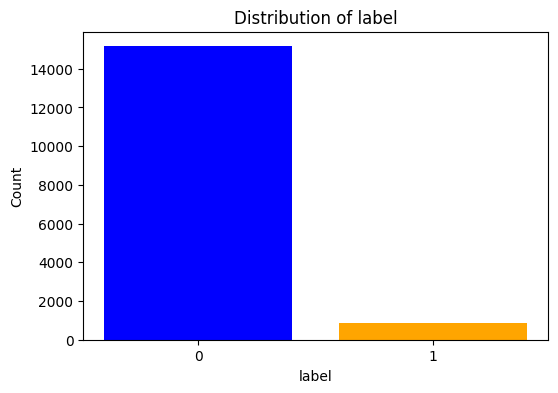

In [57]:
labels_df = pd.DataFrame(labels, columns = ['label'])
plot_binary_barchart(labels_df, 'label')

# Multivariate Anomalies 
- Have two or more attributes that are outside the norm
- Isolation Forests 
    - iTrees is the short for Isolation Trees
    - Randomized versions of Decision Trees, and splitting/branching occurs randomly
    - Random split is more likely to occur in an inlier/outlier gap, hence why the method is an efficient protocol for detecting these outliers

Only a fraction of the inliers will suffice to differentiate the outliers, which drastically reduces computation time

In [58]:
# Instantiate Isolation Forest
iforest = IForest(n_estimators=200)
iforest.fit(input_df)
labels = iforest.labels_
outliers = input_df[labels == 1]

probs = iforest.predict_proba(input_df)
outlier_probs = probs[:, 1]
confident_outliers = input_df[outlier_probs >= 0.7]

print(len(confident_outliers))

probs

71


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


array([[0.93242481, 0.06757519],
       [0.88903161, 0.11096839],
       [0.91459853, 0.08540147],
       ...,
       [0.79546942, 0.20453058],
       [0.68370842, 0.31629158],
       [0.82234317, 0.17765683]])

In [60]:

iforest = IForest()
labels = iforest.fit_predict(input_df)

outliers = input_df[labels==1]
outliers

labels_df_if = pd.DataFrame(labels, columns=['Label'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


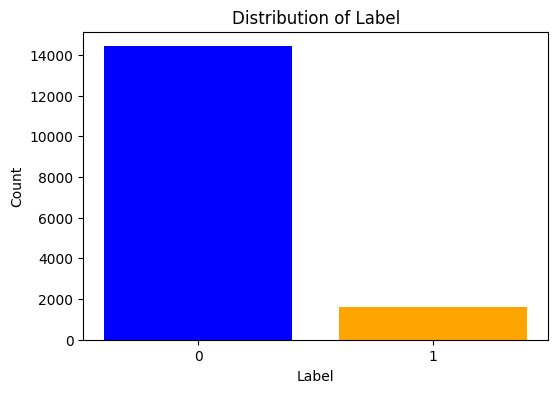

In [61]:
plot_binary_barchart(labels_df_if, 'Label')